# Machine Learning in Python

by [Piotr Migdał](http://p.migdal.pl/) & [Dominik Krzemiński](https://github.com/dokato/)

for El Passion, 2017

## 3.  Linear regression

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')

%matplotlib inline

## Bicycles data

Let's read the data from csv files.

In [29]:
# first parameter is name of the file with data
# next we specify delimiter, it can be either comma, semicolon, sometimes tab
# very often we need to cope with missing data, here we denote it by "NA"
# if the data is already enumerated pandas doesn't need to double the job
bicycles_data = pd.read_csv("data/warsaw-bicycles.csv", delimiter=",", na_values="NA", index_col=0)
weather_data = pd.read_csv("data/weather.csv", delimiter=",", na_values="NA", index_col=0)

In [30]:
bicycles_data.head()

,Data,startTyg,startM,Al. USA - południe,Al. USA - północ,Banacha,Bazyliańska,Belwederska,Dworzec Wilenski (al. Solidarności),Dworzec Wileński Nowy( Targowa),...,Most Gdański - ciąg pieszo-rowerowy,NSR - Solec - ciąg pieszo-rowerowy,NSR-Solec - ścieżka rowerowa,Rowery (Praska ścieżka rekreacyjna),Wybrzeże Helskie,Wysockiego,"Świętokrzyska - Emilii Plater, płd","Świętokrzyska - Emilii Plater, płn",Żwirki i Wigury/Trojdena1,Żwirki i Wigury/Trojdena2
1,2014-08-01,2014-07-28,2014-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-08-02,2014-07-28,2014-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-08-03,2014-07-28,2014-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-08-04,2014-08-04,2014-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2014-08-05,2014-08-04,2014-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Description method provides simple statistics for each quantitative column.

In [31]:
bicycles_data.describe()

,Al. USA - południe,Al. USA - północ,Banacha,Bazyliańska,Belwederska,Dworzec Wilenski (al. Solidarności),Dworzec Wileński Nowy( Targowa),Marszałkowska,Most Gdanski - ścieżka rowerowa,Most Gdański - ciąg pieszo-rowerowy,NSR - Solec - ciąg pieszo-rowerowy,NSR-Solec - ścieżka rowerowa,Rowery (Praska ścieżka rekreacyjna),Wybrzeże Helskie,Wysockiego,"Świętokrzyska - Emilii Plater, płd","Świętokrzyska - Emilii Plater, płn",Żwirki i Wigury/Trojdena1,Żwirki i Wigury/Trojdena2
count,405.000000,405.000000,607.000000,776.000000,413.000000,605.000000,592.000000,483.000000,897.000000,897.000000,897.000000,897.000000,391.000000,778.000000,779.000000,483.000000,483.000000,266.000000,266.000000
mean,388.575309,218.669136,1847.044481,108.515464,724.341404,812.009917,690.229730,547.654244,912.016722,499.987737,401.633222,729.855072,316.902813,1216.931877,194.169448,1106.252588,801.231884,1134.736842,271.657895
std,389.422443,225.109938,1369.713248,103.819532,646.652453,633.992398,516.540766,493.600262,929.682217,657.628789,496.925377,777.002525,432.642264,1079.877592,187.863018,1046.981693,747.282929,833.225733,195.671653
min,0.000000,0.000000,28.000000,0.000000,3.000000,27.000000,0.000000,0.000000,6.000000,0.000000,1.000000,2.000000,0.000000,27.000000,0.000000,0.000000,0.000000,16.000000,0.000000
25%,55.000000,22.000000,580.500000,19.000000,164.000000,218.000000,201.000000,149.500000,200.000000,53.000000,52.000000,136.000000,24.000000,279.250000,42.000000,274.000000,194.000000,299.500000,85.250000
50%,180.000000,98.000000,1522.000000,62.500000,399.000000,630.000000,634.500000,342.000000,500.000000,183.000000,173.000000,354.000000,135.000000,743.500000,126.000000,636.000000,499.000000,1035.000000,263.000000
75%,729.000000,400.000000,2942.500000,189.500000,1297.000000,1405.000000,1206.500000,944.000000,1511.000000,718.000000,632.000000,1227.000000,455.000000,2176.000000,326.500000,1925.000000,1368.500000,1846.250000,452.000000
max,1537.000000,932.000000,5123.000000,435.000000,2299.000000,2199.000000,1732.000000,1864.000000,5285.000000,3916.000000,3443.000000,3859.000000,2644.000000,4512.000000,1026.000000,3681.000000,2589.000000,2880.000000,665.000000


Now we take a look in a similar way at the weather dataset.

In [32]:
weather_data.head()

,date,value,state
1,2014-07-28 00:00:00,18.9,0
2,2014-07-29 00:00:00,18.7,0
3,2014-07-30 00:00:00,18.3,0
4,2014-07-31 00:00:00,19.3,0
5,2014-08-01 00:00:00,19.9,0


In [33]:
weather_data.describe()

,value,state
count,947.000000,947.0
mean,5.405280,0.0
std,7.577294,0.0
min,-19.300000,0.0
25%,0.100000,0.0
50%,5.100000,0.0
75%,11.500000,0.0
max,22.800000,0.0


Think about whether statistics for `state` make any sense to you?

### Data engineering

Now we play around weather dataset in order to extract the day of measurement.

In [34]:
weather_data["date"] = pd.to_datetime(weather_data["date"], format="%Y-%m-%d")

In [35]:
import calendar

In [36]:
weather_data["dayname"] = weather_data["date"].apply(lambda x: calendar.day_name[x.weekday()])

In [37]:
weather_data.head()

,date,value,state,dayname
1,2014-07-28,18.9,0,Monday
2,2014-07-29,18.7,0,Tuesday
3,2014-07-30,18.3,0,Wednesday
4,2014-07-31,19.3,0,Thursday
5,2014-08-01,19.9,0,Friday


In [38]:
len(weather_data)

947

In [39]:
len(bicycles_data)

910

We clearly see that there are more measurements of weather states than bicycles counts, so we need limit one dataset to make it consistent.

In [40]:
bicycles_date_min, bicycles_date_max = bicycles_data["Data"].tolist()[0], bicycles_data["Data"].tolist()[-1]

In [41]:
weather_data_filtered = weather_data.query("'{}'<=date<='{}'".format(bicycles_date_min, bicycles_date_max))

In [42]:
weather_data_filtered = weather_data_filtered.reset_index(drop=True)

In [43]:
weather_data_filtered.index += 1 

Now `weather_data_filtered` should have the same number of rows as `bicycles_data`. You may check its `len` for exercise.

In [44]:
weather_data_filtered.head()

,date,value,state,dayname
1,2014-08-01,19.9,0,Friday
2,2014-08-02,19.2,0,Saturday
3,2014-08-03,18.5,0,Sunday
4,2014-08-04,19.9,0,Monday
5,2014-08-05,17.4,0,Tuesday


So we are ready to concatenate two datasets.

In [45]:
bicycles_weather_data = pd.concat([bicycles_data, weather_data_filtered], axis=1)

Some columns are no longer useful, so we can drop them.

In [46]:
bicycles_weather_data.drop(['Data', 'state', 'startTyg', 'startM'], axis=1, inplace=True)

In [47]:
bicycles_weather_data.rename(columns={'value': 'temp'}, inplace=True)

All in all, we end up with dataset which looks like this:

In [48]:
bicycles_weather_data.head()

,Al. USA - południe,Al. USA - północ,Banacha,Bazyliańska,Belwederska,Dworzec Wilenski (al. Solidarności),Dworzec Wileński Nowy( Targowa),Marszałkowska,Most Gdanski - ścieżka rowerowa,Most Gdański - ciąg pieszo-rowerowy,...,Rowery (Praska ścieżka rekreacyjna),Wybrzeże Helskie,Wysockiego,"Świętokrzyska - Emilii Plater, płd","Świętokrzyska - Emilii Plater, płn",Żwirki i Wigury/Trojdena1,Żwirki i Wigury/Trojdena2,date,temp,dayname
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-01,19.9,Friday
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-02,19.2,Saturday
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-03,18.5,Sunday
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-04,19.9,Monday
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-05,17.4,Tuesday


In [49]:
bicycles_weather_data = bicycles_weather_data.set_index("date")

In [50]:
bicycles_weather_data.index.name=None

In [51]:
bicycles_weather_data.head()

,Al. USA - południe,Al. USA - północ,Banacha,Bazyliańska,Belwederska,Dworzec Wilenski (al. Solidarności),Dworzec Wileński Nowy( Targowa),Marszałkowska,Most Gdanski - ścieżka rowerowa,Most Gdański - ciąg pieszo-rowerowy,...,NSR-Solec - ścieżka rowerowa,Rowery (Praska ścieżka rekreacyjna),Wybrzeże Helskie,Wysockiego,"Świętokrzyska - Emilii Plater, płd","Świętokrzyska - Emilii Plater, płn",Żwirki i Wigury/Trojdena1,Żwirki i Wigury/Trojdena2,temp,dayname
2014-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.9,Friday
2014-08-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.2,Saturday
2014-08-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.5,Sunday
2014-08-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.9,Monday
2014-08-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.4,Tuesday


In [52]:
#bicycles_weather_data.to_csv("data/bicycles_weather.csv")
bicycles_weather_data = pd.read_csv("data/bicycles_weather.csv", index_col=0)

## Linear regression

Linear regression is modelling linear relationship between dependent variable y and one or more explanatory variables X. The case of one explanatory variable is called **simple linear regression**. For more than one explanatory variable, the process is called **multiple linear regression**.

$$
y = a x + b
$$

!["xkcd"](https://imgs.xkcd.com/comics/linear_regression.png)

Analyticas solutions exist:

- [Ordinary least squares](https://en.wikipedia.org/wiki/Ordinary_least_squares)

- [Ridge regression](https://en.wikipedia.org/wiki/Ridge_regression)

but are not always very efficient!

Correlation:

!["source: wikipedia.org"](https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg)

Materials:

 - https://en.wikipedia.org/wiki/Linear_regression
 
 - http://onlinestatbook.com/2/regression/intro.html
 
 - https://www.youtube.com/watch?v=KsVBBJRb9TE
 


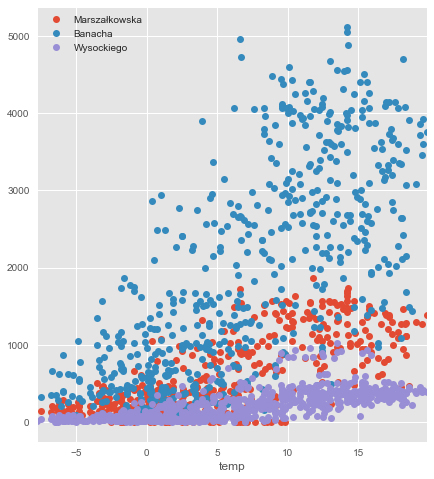

In [53]:
bicycles_weather_data.plot(x='temp', y=['Marszałkowska', 'Banacha', 'Wysockiego'], style='o', figsize=(7,8))
plt.gca().invert_xaxis()

Scikit learn documentation:

- http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

- http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

In [54]:
from sklearn import linear_model

We make a linear regression object.

In [55]:
linreg = linear_model.LinearRegression(fit_intercept=True)

In [56]:
street = 'Banacha'
bicycles_weather_subset = bicycles_weather_data[['temp', street]]
bicycles_weather_subset = bicycles_weather_subset.dropna()

In [57]:
x = bicycles_weather_subset['temp'].to_frame()
y = bicycles_weather_subset[street].to_frame()
linreg.fit(x, y)

print('Coefficients:\n a={:.3f}, b={:.3f}'.format(linreg.coef_[0][0], linreg.intercept_[0]))

print("Mean squared error: %.2f"
      % np.mean((linreg.predict(x) - y) ** 2))

Coefficients:
 a=125.862, b=1039.162
Mean squared error: 928477.32


We can plot our predicted curve.

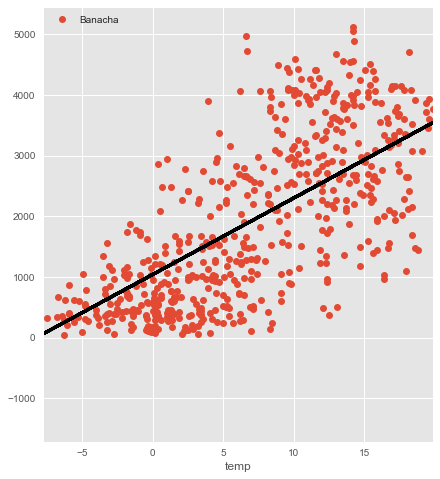

In [58]:
bicycles_weather_data.plot(x='temp', y=street, style='o', figsize=(7,8))
plt.plot(x, linreg.predict(x), color='k', linewidth=3)
plt.gca().invert_xaxis()

### Exercises

(a) Find in the dataset a street which closest to yours living / working place and perform linear regression.

(b) Find a street with the smallest _mean squared error_ of fitting.